**Summmary:**

*****USE MEDIAN Becuase of outliers*****

In [7]:
import matplotlib as plt

In [6]:
import pandas as pd
import numpy as np
import gzip
import json


def parse(path):
  g = open('Data/' + path, 'r')
  for l in g:
    yield json.loads(l)



wyoming_reviews = pd.DataFrame(parse("review-Wyoming.json"))
wyoming_metadata = pd.DataFrame(parse("meta-Wyoming.json"))


In [3]:
wyoming_reviews.head() #individual reviews with rating and time and user_id
#by user id

,user_id,name,time,rating,text,pics,resp,gmap_id
0,115646077423418438821,Sheri Burke,1570739784825,5.0,Jeff is prompt and really understanding. He h...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
1,105099928136753216602,Roxanne Norse,1505421891766,5.0,I highly recommend High Mountain Electric. Je...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
2,115843664516717640522,Rachel Velarde,1550017414366,5.0,Jeff provided prompt service and could fit me ...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
3,103613723635264236030,Michelle Barta,1504928708627,5.0,Jeff has been great to work with and has accom...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
4,113597382441988504332,Vivian Swallow,1598022469876,5.0,Awesome service very responsive!!!,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c


The GMAP_ID is the ID of the business itself so we could join tables pretty easy if we needed to on that but would need to **Group by the business** on some bound so we dont repeat the business and increase the size of the table.

In [5]:
wyoming_metadata.head()
#by business wtih aggregate data

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,High Mountain Electric LLC,"High Mountain Electric LLC, 1 Phyllis Lynn Dr,...",0x875901dbacdf1fb7:0x5e0aea8e0909ba5c,None,42.823146,-108.718111,[Electrician],5.0,8,None,"[[Thursday, 7AM–6PM], [Friday, 7AM–6PM], [Satu...",None,Open ⋅ Closes 6PM,"[0x875901dcf774b6dd:0xcdb95cc1646e5b1f, 0x8759...",https://www.google.com/maps/place//data=!4m2!3...
1,HealthSource Chiropractic of Riverton,"HealthSource Chiropractic of Riverton, 910 N 8...",0x8758dd38d63c9017:0xe4bca45ee1b90b43,None,43.034454,-108.400955,"[Chiropractor, Alternative medicine practition...",5.0,33,None,"[[Thursday, 8:30–11AM], [Friday, 8AM–1:30PM], ...","{'Highlights': ['LGBTQ friendly'], 'Accessibil...",Closed ⋅ Opens 8:30AM,"[0x8758dd1d10c1bbe3:0x3588bcff90668608, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...
2,Cornerstone Group Realty,"Cornerstone Group Realty, 215 S Broadway Ave, ...",0x8758dd1ca83449d9:0xb6156dcfc5e04c9b,None,43.022906,-108.386042,"[Real estate agency, Commercial real estate ag...",4.9,8,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'From the business': ['Identifies as women-le...,Opens soon ⋅ 8AM,"[0x8758dd1eaa8a8c83:0xfeb3a6a74a89845b, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...
3,Paynes Auto Glass,None,0x8758dddbbeda154b:0xacb5e2d1f7c14bea,None,43.135256,-108.777531,"[Glass repair service, Service establishment]",5.0,3,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",None,Closed ⋅ Opens 9AM,"[0x8758dd20a2430dd7:0x913266cb92202cd, 0x8758d...",https://www.google.com/maps/place//data=!4m2!3...
4,Central Bank & Trust,"Central Bank & Trust, 220 N Federal Blvd, Rive...",0x8758dd1d9178ee89:0x5e4228c3b4cffefb,None,43.026458,-108.381002,"[Bank, ATM]",4.0,8,None,"[[Thursday, 8:30AM–5PM], [Friday, 8:30AM–6PM],...","{'Service options': ['Drive-through'], 'Access...",Closed ⋅ Opens 8:30AM,"[0x8758dd27e6e6869f:0x520398d1843d971e, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...


**START OF EDA** 
Lets see if the USER IDS are unique

In [8]:
wyoming_reviews['user_id'].unique().shape[0] == wyoming_reviews.shape[0]

False

In [ ]:
(wyoming_reviews.shape[0] - wyoming_reviews['user_id'].unique().shape[0]) / wyoming_reviews.shape[0] #A lot of repeat reviewers 65%

0.6560857036974087

In [12]:
wyoming_reviews.groupby('user_id').count().sort_values(by='name', ascending=False).head(10)

,name,time,rating,text,pics,resp,gmap_id
user_id,,,,,,,
110506451997865529864,391,391,391,244,6,37,391
101124838118967368906,361,361,361,97,1,43,361
110011653705662087009,295,295,295,289,0,32,295
115340918252460052056,260,260,260,246,17,30,260
103039478470722818148,259,259,259,15,0,24,259
104034249088678019450,252,252,252,1,0,24,252
109641731811453914838,242,242,242,228,19,29,242
112040664558761031234,239,239,239,21,1,23,239
108577705927319698891,232,232,232,62,0,19,232


**Some users leave many reviews. Could these be BOT reviews? CAN WE feature engineer a reputation score for 'user_id'**

Let us now take a look at some distributions of the variables in these data tables

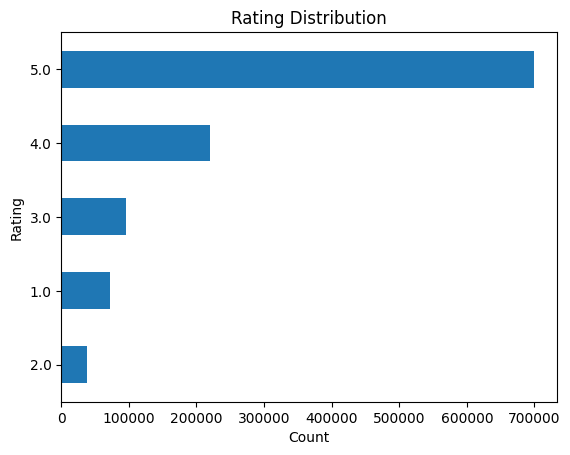

In [21]:
wyoming_reviews['rating'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title='Rating Distribution', xlabel='Count', ylabel='Rating');

***So in generall it looks like people are most likely to give reviews when the business is GREAT and good reviews as well but ALSO people like to give 1STAR reviews over JUST OK 2STAR reviews***

In [ ]:
(wyoming_metadata.shape[0] - wyoming_metadata['name'].unique().shape[0]) / wyoming_metadata.shape[0] #Not that many repeats, 14%

0.14750165453342157

In [30]:
wyoming_metadata['name'].value_counts().sort_values(ascending=False).head(10)

name
Subway                                             66
The Church of Jesus Christ of Latter-day Saints    51
Sinclair                                           51
Exxon                                              39
Conoco                                             34
United States Postal Service                       34
Pizza Hut                                          32
Family Dollar                                      30
McDonald's                                         28
Taco John's                                        27
Name: count, dtype: int64

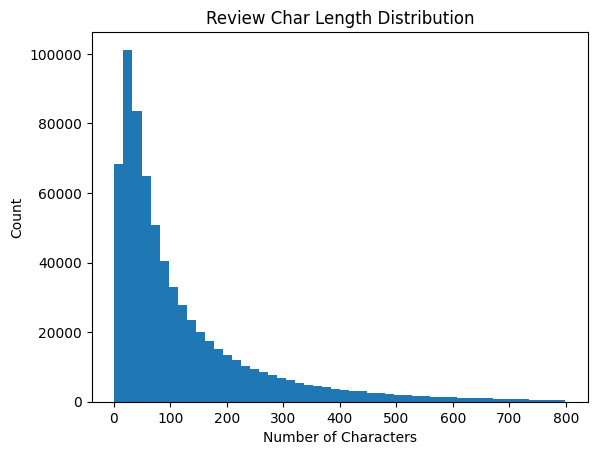

In [44]:
number_of_chars = wyoming_reviews['text'].apply(lambda x: len(x) if isinstance(x, str) and len(x) < 800 else None)
number_of_chars.plot(kind='hist', bins=50, title='Review Char Length Distribution', xlabel='Number of Characters', ylabel='Count');

In [51]:
np.percentile(number_of_chars.dropna(), 50)

np.float64(71.0)

**Clearly skewed right, but what about the number of words**

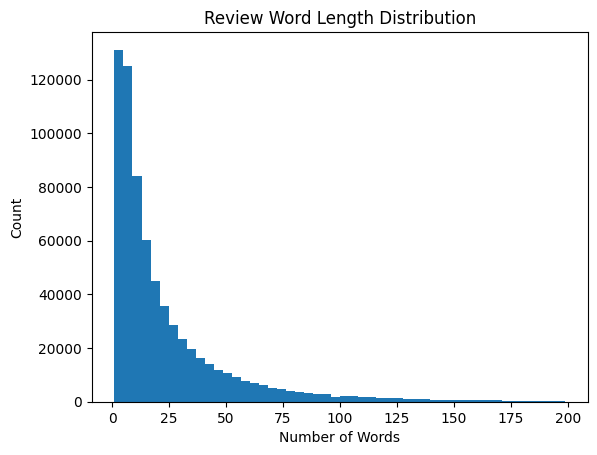

In [43]:
number_of_words = wyoming_reviews['text'].apply(lambda x: len(x.split()) if isinstance(x, str) and len(x.split()) < 200 else None)
number_of_words.plot(kind='hist', bins=50, title='Review Word Length Distribution', xlabel='Number of Words', ylabel='Count');

In [50]:
np.percentile(number_of_words.dropna(), 50)

np.float64(13.0)

In [52]:
wyoming_reviews.shape

(1141421, 8)

In [53]:
(wyoming_metadata['gmap_id'].dropna().shape[0] - wyoming_metadata['gmap_id'].dropna().unique().shape[0]) /wyoming_metadata.shape[0]

0.005956320317670417

In [54]:
wyoming_reviews.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,115646077423418438821,Sheri Burke,1570739784825,5.0,Jeff is prompt and really understanding. He h...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
1,105099928136753216602,Roxanne Norse,1505421891766,5.0,I highly recommend High Mountain Electric. Je...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
2,115843664516717640522,Rachel Velarde,1550017414366,5.0,Jeff provided prompt service and could fit me ...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
3,103613723635264236030,Michelle Barta,1504928708627,5.0,Jeff has been great to work with and has accom...,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c
4,113597382441988504332,Vivian Swallow,1598022469876,5.0,Awesome service very responsive!!!,None,None,0x875901dbacdf1fb7:0x5e0aea8e0909ba5c


In [65]:
first_dup = wyoming_metadata.groupby('gmap_id').count().sort_values(by='name', ascending=False).head(10).index[9]

Lets check if the duplicates include the same or different data? **(Was it just recorded twice or is there errors in the data)**

In [66]:
wyoming_metadata[wyoming_metadata['gmap_id'] == first_dup]

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
39,Village Inn,"Village Inn, 2414 W Lincolnway, Cheyenne, WY 8...",0x875603c9f38da68d:0x66c7a97bb1dec0dc,Family-friendly chain serving homestyle Americ...,41.120929,-104.847266,"[Breakfast restaurant, American restaurant, Ba...",2.0,5,$,"[[Wednesday, 6AM–10PM], [Thursday, 6AM–10PM], ...","{'Service options': ['Delivery'], 'Accessibili...",Permanently closed,"[0x876f252831edb643:0x723d27b6148ac597, 0x876f...",https://www.google.com/maps/place//data=!4m2!3...
111,Village Inn,"Village Inn, 2414 W Lincolnway, Cheyenne, WY 8...",0x875603c9f38da68d:0x66c7a97bb1dec0dc,Family-friendly chain serving homestyle Americ...,41.120929,-104.847266,"[Breakfast restaurant, American restaurant, Ba...",2.0,5,$,"[[Wednesday, 6AM–10PM], [Thursday, 6AM–10PM], ...","{'Service options': ['Delivery'], 'Accessibili...",Permanently closed,"[0x876f252831edb643:0x723d27b6148ac597, 0x876f...",https://www.google.com/maps/place//data=!4m2!3...


In [73]:
wyoming_metadata = wyoming_metadata.dropna(subset=['gmap_id']).drop_duplicates(subset=['gmap_id'], keep='first').shape[0] 